In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from validation import read_grid_search_results
import ast
from scipy.stats import rankdata
import json

results_paths = [
	'fine_gs_results_giulia1.csv',
	'fine_gs_results_giulia2.csv',
	'fine_gs_results_giulia3.csv',
	'fine_gs_results_giulia4.csv',
	'fine_gs_results_irene1.csv',
	'fine_gs_results_irene2.csv',
	'fine_gs_results_irene3.csv',
	'fine_gs_results_irene4.csv'
]
all_results_path = 'fine_gs.csv'
ranked_results_path = 'fine_gs_params_rank.csv'
K = 5

# concatenate results into a single dataframe
scores_df = pd.DataFrame(columns=[])
for path in results_paths:
	partial_scores_df = pd.read_csv(path, sep=",")
	scores_df = pd.concat([scores_df, partial_scores_df], ignore_index=True)

N_MODELS=len(scores_df)

# rank results
scores_df['val_mee_mean_rank'] = rankdata(scores_df['val_mee_mean'], method='dense')
scores_df['val_mse_mean_rank'] = rankdata(scores_df['val_mse_mean'], method='dense')
scores_df['tr_mee_mean_rank'] = rankdata(scores_df['tr_mee_mean'], method='dense')
scores_df['tr_mse_mean_rank'] = rankdata(scores_df['tr_mse_mean'], method='dense')

# sort results by 'val_score_mean_rank'
scores_df = scores_df.sort_values(by=['val_mee_mean_rank'], ignore_index=True)
scores_df.drop(scores_df.columns[0], axis=1, inplace=True)

columns_order = [
	'val_mse_mean_rank',
	'val_mse_mean',
	'val_mse_dev',
	'val_mee_mean_rank',
	'val_mee_mean',
	'val_mee_dev',
	'tr_mse_mean_rank',
	'tr_mse_mean',
	'tr_mse_dev',
	'tr_mee_mean_rank',
	'tr_mee_mean',
	'tr_mee_dev',
]
for i in range(K):
	columns_order.append('split%d_val_mse'%(i))
	columns_order.append('split%d_val_mee'%(i))
	columns_order.append('split%d_tr_mse'%(i))
	columns_order.append('split%d_tr_mee'%(i))
	columns_order.append('split%d_best_epoch'%(i))
columns_order.append('params')
scores_df = scores_df[columns_order]

# write params as csv deleting fixed params
rem_list = [ 
	'activation_out',
	'classification',
	'early_stopping',
	'evaluation_metric',
	'loss',
	'metric_decrease_tol',
	'random_state',
	'reinit_weights',
	'stopping_patience',
	'tol',
	'validation_size',
	'verbose',
	'weights_bound',
	'weights_dist',
	'epochs',
	'batch_size'
	]
params_df = pd.DataFrame(columns=[])
for param in scores_df['params']: # TODO: fare in modo migliore?
	params_dict = json.loads(param)
	for key in rem_list:
		del params_dict[key]
	params_df = pd.concat([params_df, pd.DataFrame([params_dict])], ignore_index=True)

params_df['val_mee_mean'] = scores_df['val_mee_mean']
params_df['tr_mee_mean'] = scores_df['tr_mee_mean']
params_df['val_mee_dev'] = scores_df['val_mee_dev']
params_df['split0_val_mee'] = scores_df['split0_val_mee']
params_df['split1_val_mee'] = scores_df['split1_val_mee']
params_df['split2_val_mee'] = scores_df['split2_val_mee']
params_df['split3_val_mee'] = scores_df['split3_val_mee']
params_df['split4_val_mee'] = scores_df['split4_val_mee']
params_df['split0_best_epoch'] = scores_df['split0_best_epoch']
params_df['split1_best_epoch'] = scores_df['split1_best_epoch']
params_df['split2_best_epoch'] = scores_df['split2_best_epoch']
params_df['split3_best_epoch'] = scores_df['split3_best_epoch']
params_df['split4_best_epoch'] = scores_df['split4_best_epoch']

hidden_layer_sizes = []
for i in range(len(params_df)):
	if (params_df['hidden_layer_sizes'][i]) == [30, 30]:
		hidden_layer_sizes.append('2layer30')
	elif (params_df['hidden_layer_sizes'][i]) == [30, 60]:
		hidden_layer_sizes.append('2layer30-60')
	elif (params_df['hidden_layer_sizes'][i]) == [60, 30]:
		hidden_layer_sizes.append('2layer60-30')
	else:
		hidden_layer_sizes.append('3layer30')
params_df['hidden'] = hidden_layer_sizes
params_df

,activation_hidden,alpha,hidden_layer_sizes,lambd,learning_rate,learning_rate_init,nesterov,tau,val_mee_mean,tr_mee_mean,...,split1_val_mee,split2_val_mee,split3_val_mee,split4_val_mee,split0_best_epoch,split1_best_epoch,split2_best_epoch,split3_best_epoch,split4_best_epoch,hidden
0,logistic,0.75,"[60, 30]",0.0005,linear_decay,0.1,False,200,1.440961,1.282529,...,1.560931,1.270175,1.409711,1.383322,198.0,205.0,187.0,197.0,201.0,2layer60-30
1,logistic,0.75,"[60, 30]",0.0005,linear_decay,0.1,False,500,1.446914,1.183497,...,1.542944,1.244375,1.367447,1.447019,239.0,308.0,454.0,388.0,328.0,2layer60-30
2,logistic,0.75,"[60, 30]",0.0010,linear_decay,0.1,False,500,1.447287,1.234753,...,1.557210,1.299655,1.354278,1.435044,275.0,252.0,308.0,247.0,327.0,2layer60-30
3,logistic,0.75,"[30, 30, 30]",0.0005,linear_decay,0.1,False,200,1.450581,1.254458,...,1.540522,1.275583,1.402335,1.400209,197.0,194.0,212.0,200.0,183.0,3layer30
4,logistic,0.75,"[30, 30, 30]",0.0001,linear_decay,0.1,False,200,1.452667,1.224861,...,1.550631,1.306543,1.376753,1.391639,270.0,221.0,304.0,247.0,492.0,3layer30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,logistic,0.80,"[30, 30, 30]",0.0005,linear_decay,0.2,False,200,7.283786,7.177479,...,7.189575,7.177533,7.315734,7.411754,40.0,30.0,72.0,26.0,26.0,3layer30
936,logistic,0.80,"[30, 30, 30]",0.0001,linear_decay,0.2,True,200,7.301484,7.222823,...,7.151924,7.156957,7.463450,7.382423,10.0,18.0,28.0,20.0,28.0,3layer30
937,logistic,0.75,"[30, 30, 30]",0.0005,linear_decay,0.2,True,500,7.317542,6.589110,...,7.247688,7.064100,7.367191,7.411633,61.0,72.0,9.0,28.0,9.0,3layer30
938,logistic,0.80,"[30, 30, 30]",0.0010,linear_decay,0.2,True,200,7.327258,27.682561,...,7.440003,7.025122,7.379323,7.447007,19.0,0.0,66.0,17.0,77.0,3layer30


<AxesSubplot:xlabel='hidden', ylabel='alpha'>

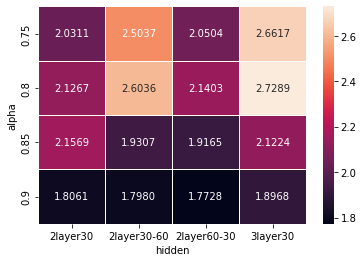

In [125]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='alpha',
        columns='hidden'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='alpha'>

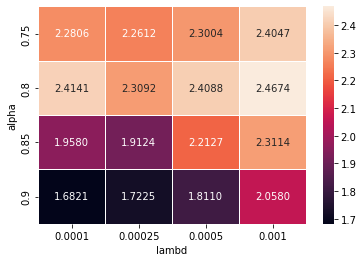

In [126]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='alpha',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)


<AxesSubplot:xlabel='learning_rate_init', ylabel='alpha'>

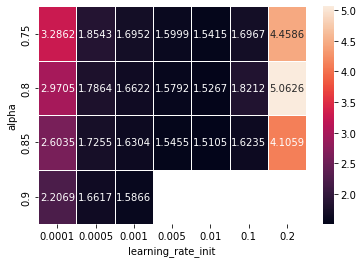

In [127]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='alpha',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='hidden'>

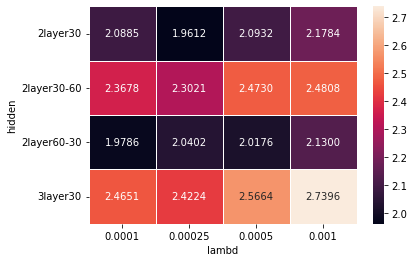

In [128]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='hidden',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='hidden'>

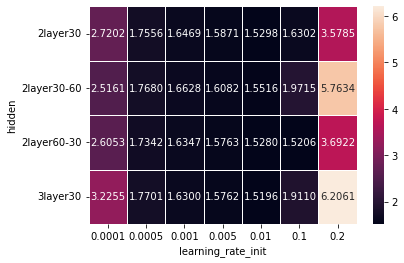

In [129]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='hidden',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='lambd'>

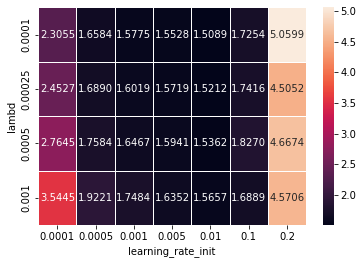

In [130]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='lambd',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

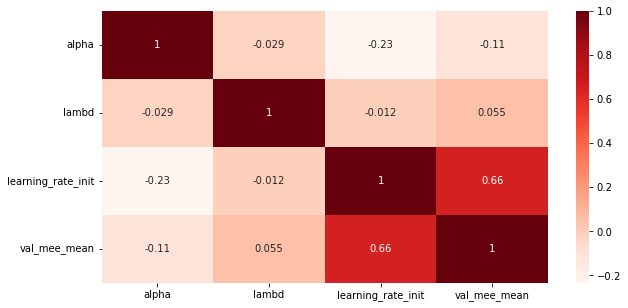

In [131]:
plt.figure(figsize=(10,5))
sns.heatmap(params_df[['alpha', 'lambd', 'learning_rate_init', 'learning_rate', 'hidden', 'val_mee_mean']].corr(), cmap=plt.cm.Reds, annot=True)
plt.show()

Text(0, 0.5, 'val_mee_mean')

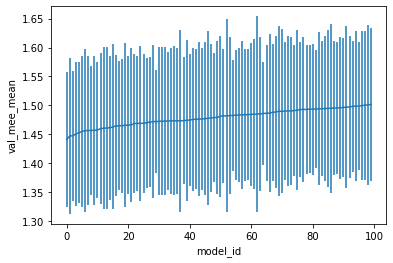

In [132]:
plt.errorbar(x=np.arange(100), y=params_df['val_mee_mean'][:100], yerr=params_df['val_mee_dev'][:100])
plt.xlabel("model_id")
plt.ylabel("val_mee_mean")

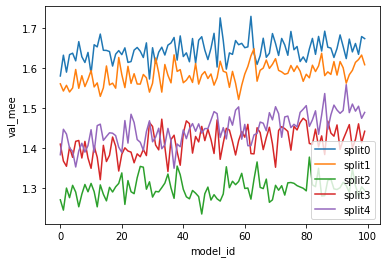

In [133]:
plt.plot(np.arange(100), params_df['split0_val_mee'][:100], label='split0')
plt.plot(np.arange(100), params_df['split1_val_mee'][:100], label='split1')
plt.plot(np.arange(100), params_df['split2_val_mee'][:100], label='split2')
plt.plot(np.arange(100), params_df['split3_val_mee'][:100], label='split3')
plt.plot(np.arange(100), params_df['split4_val_mee'][:100], label='split4')
plt.xlabel("model_id")
plt.ylabel("val_mee")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


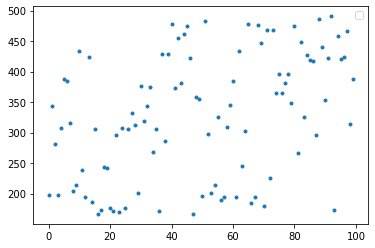

In [134]:
plt.plot((params_df['split0_best_epoch'][:100]+
		params_df['split1_best_epoch'][:100]+
		params_df['split2_best_epoch'][:100]+
		params_df['split3_best_epoch'][:100]+
		params_df['split4_best_epoch'][:100])/5
		,'.')
"""plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='2layer30-60'][:100]+
		params_df['split1_best_epoch'][params_df['hidden']=='2layer30-60'][:100]+
		params_df['split2_best_epoch'][params_df['hidden']=='2layer30-60'][:100]+
		params_df['split3_best_epoch'][params_df['hidden']=='2layer30-60'][:100]+
		params_df['split4_best_epoch'][params_df['hidden']=='2layer30-60'][:100])/5
		,label='2layer30-60')
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='2layer60-30'][:100]+
		params_df['split1_best_epoch'][params_df['hidden']=='2layer60-30'][:100]+
		params_df['split2_best_epoch'][params_df['hidden']=='2layer60-30'][:100]+
		params_df['split3_best_epoch'][params_df['hidden']=='2layer60-30'][:100]+
		params_df['split4_best_epoch'][params_df['hidden']=='2layer60-30'][:100])/5
		,label='2layer60-30')
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='3layer30'][:100]+
		params_df['split1_best_epoch'][params_df['hidden']=='3layer30'][:100]+
		params_df['split2_best_epoch'][params_df['hidden']=='3layer30'][:100]+
		params_df['split3_best_epoch'][params_df['hidden']=='3layer30'][:100]+
		params_df['split4_best_epoch'][params_df['hidden']=='3layer30'][:100])/5
		,label='3layer30')"""
plt.legend()

In [135]:
params_df[params_df['learning_rate']=='fixed'][:30]
# alziamo lambda e lr per fixed



,activation_hidden,alpha,hidden_layer_sizes,lambd,learning_rate,learning_rate_init,nesterov,tau,val_mee_mean,tr_mee_mean,...,split1_val_mee,split2_val_mee,split3_val_mee,split4_val_mee,split0_best_epoch,split1_best_epoch,split2_best_epoch,split3_best_epoch,split4_best_epoch,hidden
105,logistic,0.90,"[30, 30, 30]",0.00010,fixed,0.0010,True,200,1.504796,1.448256,...,1.630474,1.280153,1.465081,1.520746,495.0,497.0,499.0,496.0,496.0,3layer30
174,logistic,0.90,"[60, 30]",0.00010,fixed,0.0010,True,200,1.527778,1.458165,...,1.628120,1.331147,1.493695,1.515522,498.0,499.0,498.0,499.0,497.0,2layer60-30
181,logistic,0.90,"[60, 30]",0.00010,fixed,0.0010,False,200,1.529982,1.465542,...,1.645862,1.312009,1.481258,1.531077,495.0,499.0,497.0,497.0,499.0,2layer60-30
191,logistic,0.90,"[30, 30, 30]",0.00025,fixed,0.0010,True,200,1.535080,1.479258,...,1.627250,1.306491,1.524302,1.529640,497.0,492.0,499.0,498.0,496.0,3layer30
194,logistic,0.90,"[30, 30, 30]",0.00010,fixed,0.0010,False,200,1.536125,1.447302,...,1.642467,1.347884,1.513533,1.498074,498.0,494.0,496.0,498.0,494.0,3layer30
214,logistic,0.90,"[30, 30, 30]",0.00025,fixed,0.0010,False,200,1.541675,1.479929,...,1.634972,1.333407,1.506426,1.544487,499.0,494.0,499.0,498.0,494.0,3layer30
216,logistic,0.90,"[30, 30]",0.00010,fixed,0.0010,False,200,1.542701,1.479698,...,1.669306,1.334981,1.510879,1.516600,499.0,498.0,499.0,499.0,497.0,2layer30
222,logistic,0.90,"[60, 30]",0.00025,fixed,0.0010,True,200,1.544723,1.495339,...,1.637664,1.366247,1.511660,1.531330,496.0,496.0,489.0,498.0,484.0,2layer60-30
229,logistic,0.90,"[30, 30]",0.00010,fixed,0.0010,True,200,1.545828,1.478342,...,1.650940,1.356774,1.520713,1.513510,497.0,499.0,497.0,499.0,499.0,2layer30
233,logistic,0.85,"[60, 30]",0.00010,fixed,0.0010,True,200,1.548907,1.506205,...,1.643821,1.316674,1.518802,1.556885,498.0,499.0,496.0,497.0,496.0,2layer60-30


In [136]:
params_df['mean_best_epoch'] = (params_df['split0_best_epoch']+
		params_df['split1_best_epoch']+
		params_df['split2_best_epoch']+
		params_df['split3_best_epoch']+
		params_df['split4_best_epoch'])/5
params_df['mean_best_epoch'][:50]

0     197.6
1     343.4
2     281.8
3     197.2
4     306.8
5     388.4
6     383.8
7     316.4
8     203.6
9     214.0
10    433.8
11    239.4
12    194.4
13    423.6
14    186.0
15    306.6
16    167.0
17    173.0
18    243.2
19    242.0
20    176.8
21    171.6
22    296.2
23    170.2
24    307.6
25    176.8
26    305.8
27    332.4
28    311.8
29    201.6
30    375.8
31    318.8
32    343.6
33    374.0
34    268.2
35    306.6
36    171.4
37    429.2
38    286.6
39    428.2
40    477.8
41    373.8
42    454.4
43    380.8
44    461.0
45    474.2
46    421.4
47    166.6
48    358.4
49    354.6
Name: mean_best_epoch, dtype: float64

In [137]:
params_df[(params_df['lambd']==0.001) & (params_df['learning_rate']=='linear_decay') & (params_df['learning_rate_init']==0.1)][:50]

,activation_hidden,alpha,hidden_layer_sizes,lambd,learning_rate,learning_rate_init,nesterov,tau,val_mee_mean,tr_mee_mean,...,split2_val_mee,split3_val_mee,split4_val_mee,split0_best_epoch,split1_best_epoch,split2_best_epoch,split3_best_epoch,split4_best_epoch,hidden,mean_best_epoch
2,logistic,0.75,"[60, 30]",0.001,linear_decay,0.1,False,500,1.447287,1.234753,...,1.299655,1.354278,1.435044,275.0,252.0,308.0,247.0,327.0,2layer60-30,281.8
14,logistic,0.75,"[60, 30]",0.001,linear_decay,0.1,True,200,1.461244,1.335513,...,1.284234,1.406823,1.419196,179.0,229.0,186.0,155.0,181.0,2layer60-30,186.0
15,logistic,0.75,"[30, 60]",0.001,linear_decay,0.1,False,500,1.462677,1.256554,...,1.267623,1.366177,1.429046,367.0,294.0,315.0,268.0,289.0,2layer30-60,306.6
16,logistic,0.75,"[30, 60]",0.001,linear_decay,0.1,False,200,1.464392,1.305707,...,1.301542,1.381939,1.438276,148.0,169.0,173.0,157.0,188.0,2layer30-60,167.0
17,logistic,0.75,"[30, 30]",0.001,linear_decay,0.1,False,200,1.464567,1.317279,...,1.289809,1.427635,1.437200,165.0,167.0,171.0,185.0,177.0,2layer30,173.0
19,logistic,0.80,"[30, 30]",0.001,linear_decay,0.1,False,500,1.465440,1.232547,...,1.311377,1.342379,1.402172,254.0,174.0,220.0,277.0,285.0,2layer30,242.0
20,logistic,0.80,"[30, 60]",0.001,linear_decay,0.1,False,200,1.465901,1.305755,...,1.337671,1.384586,1.388999,177.0,176.0,171.0,175.0,185.0,2layer30-60,176.8
21,logistic,0.80,"[60, 30]",0.001,linear_decay,0.1,False,200,1.466170,1.289265,...,1.258707,1.400543,1.468898,151.0,187.0,174.0,179.0,167.0,2layer60-30,171.6
23,logistic,0.75,"[30, 30, 30]",0.001,linear_decay,0.1,False,200,1.468781,1.299173,...,1.290529,1.389772,1.484738,171.0,170.0,173.0,158.0,179.0,3layer30,170.2
25,logistic,0.75,"[30, 30, 30]",0.001,linear_decay,0.1,True,200,1.468990,1.323684,...,1.325481,1.385398,1.421319,192.0,167.0,175.0,185.0,165.0,3layer30,176.8


In [138]:
params_df[['alpha', 'hidden', 'nesterov', 'tau', 'val_mee_mean']][(params_df['lambd']==0.00025) & (params_df['learning_rate']=='linear_decay') & (params_df['learning_rate_init']==0.01)]

,alpha,hidden,nesterov,tau,val_mee_mean
48,0.80,3layer30,False,500,1.478808
60,0.85,2layer30,True,500,1.484433
74,0.80,3layer30,True,500,1.490863
76,0.80,2layer60-30,False,500,1.492754
77,0.80,2layer60-30,True,500,1.492944
78,0.80,2layer30,False,500,1.492965
83,0.75,3layer30,False,500,1.494117
90,0.75,3layer30,True,500,1.496359
99,0.80,2layer30,True,500,1.501608
101,0.85,2layer30,False,500,1.503200


In [144]:
params_df[['alpha', 'lambd', 'learning_rate', 'nesterov', 'tau', 'val_mee_mean']][(params_df['hidden']=='2layer30-60')][:50]

,alpha,lambd,learning_rate,nesterov,tau,val_mee_mean
5,0.80,0.00025,linear_decay,False,200,1.454915
10,0.80,0.00010,linear_decay,False,200,1.457581
15,0.75,0.00100,linear_decay,False,500,1.462677
16,0.75,0.00100,linear_decay,False,200,1.464392
20,0.80,0.00100,linear_decay,False,200,1.465901
24,0.75,0.00050,linear_decay,False,500,1.468887
53,0.75,0.00050,linear_decay,False,200,1.482136
55,0.75,0.00010,linear_decay,False,200,1.482912
57,0.80,0.00050,linear_decay,False,200,1.483502
79,0.75,0.00025,linear_decay,False,200,1.493402


In [145]:
params_df[['alpha', 'lambd', 'learning_rate', 'nesterov', 'tau', 'val_mee_mean']][(params_df['hidden']=='2layer60-30')][:50]

,alpha,lambd,learning_rate,nesterov,tau,val_mee_mean
0,0.75,0.00050,linear_decay,False,200,1.440961
1,0.75,0.00050,linear_decay,False,500,1.446914
2,0.75,0.00100,linear_decay,False,500,1.447287
6,0.75,0.00025,linear_decay,False,500,1.456187
12,0.80,0.00050,linear_decay,False,200,1.460538
13,0.80,0.00010,linear_decay,True,200,1.460687
14,0.75,0.00100,linear_decay,True,200,1.461244
18,0.75,0.00025,linear_decay,False,200,1.464793
21,0.80,0.00100,linear_decay,False,200,1.466170
22,0.80,0.00050,linear_decay,False,500,1.468595


In [139]:
# cosa hanno in comune le migliori?
# cosa scartare


# quali conf hanno tr_mse_mean 1.1 
# val mse cambia o va di pari passo?

# come vedere quante ore mancano su kaggle?
# quando lambda piccolo va in overfitting?
# evitare di fare piantare le migliori? temo diventi sequential selection...

# test statistico

# TENIAMO IN CONSIDERAZIONE CHE:
# reti più grosse => regolarizzazione maggiore (+pesi=+parametri)
# favorire modelli con lambda più alto se hanno pari perf (meno complessi, meno probabile che vadano in overfitting)
# se non troviamo trend => facciamo ensemble (oppure se dev std alta)

# DA VISUALIZZARE:
# test statistici per media e dev standard?
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html
# plot medie e dev standard MEE (applicare 1-standard error rule)

# NEL FRATTEMPO:
# Pulire codice gs e val e nel frattempo e mettere su script per ensemble / evaluation finale?
# Per la classificazione fare controlli in score (target encoding) 
# Rivedere implementazione metriche!!! Eventualmente implementare score in modo che prenda una lista di metriche e restituisca una lista di predizioni. 
# Senza linear decay non fare il controllo su tau 
# Fare test su Monk, curve e risultati in tabella (migliore configurazione)

In [140]:
0,logistic,0.75,128,"[60, 30]",0.0005,linear_decay,0.1,False,200


40,logistic,0.75,128,"[30, 60]",0.0005,linear_decay,0.1,False,500

NameError: name 'logistic' is not defined